# **Introduction to Week 4 Assignments**


In this week's assignments, you will work on **two packages** the  

1. **`week4_moveit_config`** 

2. **`hwros_week4_assignment`**

* You need to edit the **configuration** in the 
 **`week4_moveit_config`** package 
 
  * and edit the code/scripts in the **`hwros_week4_assignment`** package.

# **Practical Assignment 1**


### **1. Modifying an existing MoveIt configuration package**

* In **Module 4.3**, the **MoveIt Setup Assistant** was introduced as a tool to setup everything we need to be able to use with MoveIt. 








*  We have created an assignment-specific **MoveIt configuration package**, it's called **`week4_moveit_config`**.



**`GOAL`** 

* Learn how to use and modify an existing **MoveIt configuration package**.



## **Assignment 1 --- 3 Points**


**`Step 1:`** Launch the **`week4_moveit_config`** setup assistant:



In [ ]:
$ roslaunch week4_moveit_config setup_assistant.launch

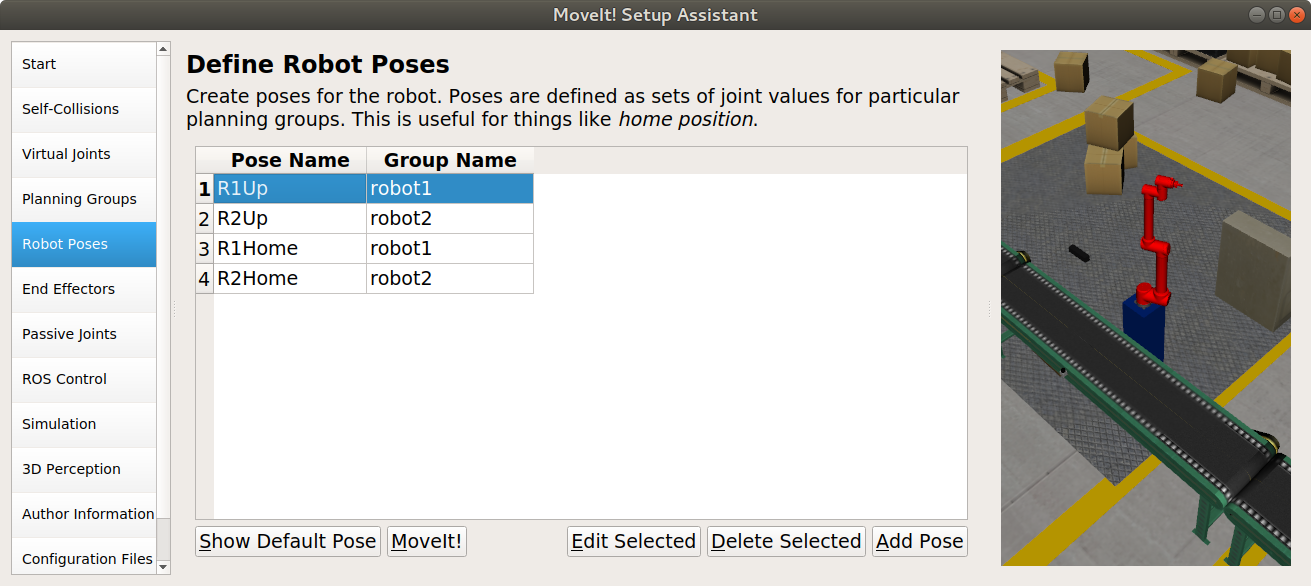

**`Step 4:`** Add four new poses (two for each robot) with the following names and joint values:



**`robot1 group:`**



In [ ]:
R1PreGrasp:

        <joint name="robot1_elbow_joint" value="1.57" />
        <joint name="robot1_shoulder_lift_joint" value="-1.57" />
        <joint name="robot1_shoulder_pan_joint" value="0.4143" />
        <joint name="robot1_wrist_1_joint" value="-1.57" />
        <joint name="robot1_wrist_2_joint" value="-1.57" />
        <joint name="robot1_wrist_3_joint" value="0" />

R1Place:

        <joint name="robot1_elbow_joint" value="1.57" />
        <joint name="robot1_shoulder_lift_joint" value="-1.57" />
        <joint name="robot1_shoulder_pan_joint" value="2.87" />
        <joint name="robot1_wrist_1_joint" value="-1.57" />
        <joint name="robot1_wrist_2_joint" value="-1.57" />
        <joint name="robot1_wrist_3_joint" value="0" />

**`robot2 group:`**



In [ ]:
R2PreGrasp:

        <joint name="robot2_elbow_joint" value="1.3809" />
        <joint name="robot2_shoulder_lift_joint" value="-0.8976" />
        <joint name="robot2_shoulder_pan_joint" value="0.7" />
        <joint name="robot2_wrist_1_joint" value="-2.0023" />
        <joint name="robot2_wrist_2_joint" value="-1.6225" />
        <joint name="robot2_wrist_3_joint" value="0" />

R2Place:

        <joint name="robot2_elbow_joint" value="1.3364" />
        <joint name="robot2_shoulder_lift_joint" value="-1.3017" />
        <joint name="robot2_shoulder_pan_joint" value="2.6902" />
        <joint name="robot2_wrist_1_joint" value="-1.6489" />
        <joint name="robot2_wrist_2_joint" value="-1.6225" />
        <joint name="robot2_wrist_3_joint" value="0" />

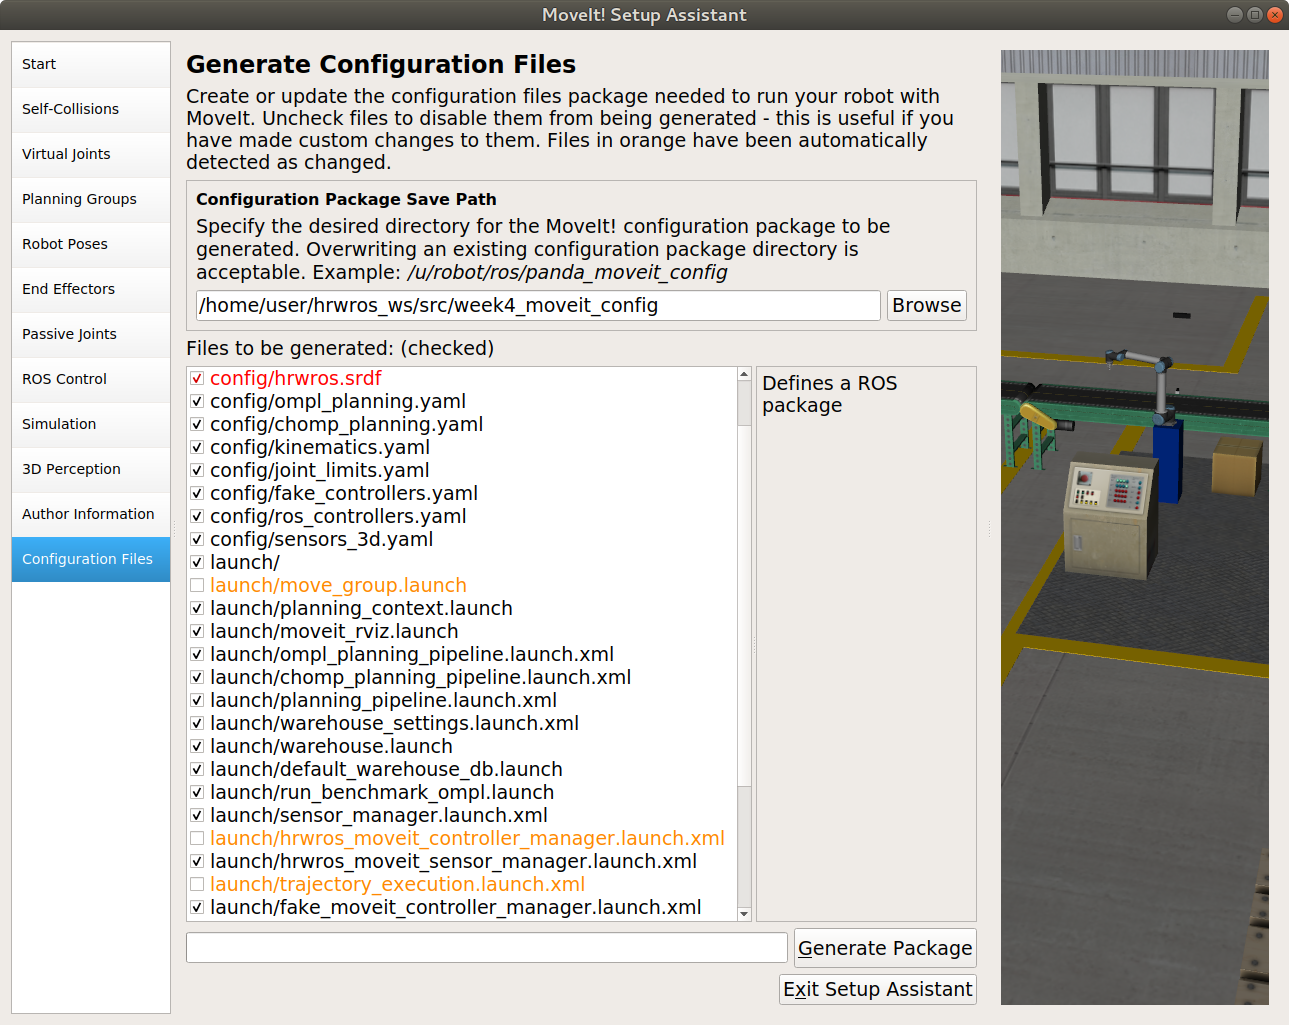

# **Practical Assignment 2**

## **Use the MoveIt commander cmdline**



* In this assignment, you will write a script, called **`week4_assignment2_script`**, 
 * to make robot2 execute a sequence using this tool.

For example, you can add the following commands in the script:



```
use robot1
go R1Up
go down 0.2
```



## **Assignment 2 --- 2 Points**


**`Step 1:`** Start the factory simulation for week 4 with:



In [ ]:
$ roslaunch hrwros_week4_assignment hrwros_week4_environment.launch

**`Step 2:`** In your favorite editor, edit the file **`week4_assignment2_script`** 

 * that you will find on the **`hrwros_week4_assignment/scripts`** folder.

**Step 3:** Using the instructions of **`Module 4.4`**, add a sequence of MoveIt Commander instructions such that the **`robot2`** executes the following motions:

1. The robot2 goes to the R2Home configuration.

2. The robot2 goes to the R2PreGrasp configuration.

3. The end effector of robot2 moves linearly down by 0.1m.

4. The robot2 goes to the R2Place configuration.

5. The end effector of robot2 moves linearly down by 0.2m.

In [ ]:
use robot2
go R2Home
go R2PreGrasp
go down 0.1
go R2Place
go down 0.2

**`Step 4:`**  In a new CCS, Move to the **same file path of the script.**



In [ ]:
$ roscd hrwros_week4_assignment/scripts

**`Step 5: `** In that CCS, start the MoveIt commander with the following command:



In [ ]:
$ rosrun hrwros_week4 hrwros_moveit_commander_cmdline

**`Step 6:`** Run the script you just created on the **`MoveIt`**! commander prompt that shows up.



In [ ]:
> load week4_assignment2_script

# **Practical Assignment 3**

## **Use the MoveIt MoveGroup Interface**


**TO DO :**

* We will use a python script called **`week4_assignment3.py`** that sends commands to the **`robot2`** 

 * using the **`moveit_commander`** API studied during the week.


## **Week 4 - Assignment 3 --- 4 Points**


**`Step 1:`** Complete the script **`week4_assignment3.py`** located on the  
 
 * scripts folder of the **`hrwros_week4_assignment`** package.

In [ ]:
#!/usr/bin/env python3
# Software License Agreement (BSD License)
#
# Authors: the HRWROS mooc instructors
import sys
import copy
import rospy
import moveit_commander
import moveit_msgs.msg
import actionlib
import geometry_msgs


def week4_assignment3():
    # First initialize moveit_commander and rospy.
    moveit_commander.roscpp_initialize(sys.argv)
    rospy.init_node('week4_assignment3',
                    anonymous=True)

    # Instantiate a MoveGroupCommander object.  This object is an interface
    # to one group of joints.  In this case the group refers to the joints of
    # robot2. This interface can be used to plan and execute motions on robot2.
    robot2_group = moveit_commander.MoveGroupCommander("<write your code here>")

    # Action clients to the ExecuteTrajectory action server.
    robot2_client = actionlib.SimpleActionClient('execute_trajectory',
                                                 moveit_msgs.msg.ExecuteTrajectoryAction)
    robot2_client.wait_for_server()
    rospy.loginfo('Execute Trajectory server is available for robot2')

    # Move robot2 to R2Home robot pose with the set_named_target API.
    robot2_group.set_named_target("<write your code here>")

    # Plan to the desired joint-space goal using
    # the default planner (RRTConnect).
    _, plan, _, _ = robot2_group.plan()
    # Create a goal message object for the action server.
    robot2_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    # Update the trajectory in the goal message.
    robot2_goal.trajectory = plan

    # Print message
    rospy.loginfo('Go to Home')

    # Send the goal to the action server.
    robot2_client.send_goal(<write your code here>)
    robot2_client.wait_for_result()

    # Move robot2 to R2PreGrasp pose
    robot2_group.set_named_target("<write your code here>")

    _, plan, _, _ = robot2_group.plan()
    robot2_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    robot2_goal.trajectory = plan

    # Print message
    rospy.loginfo('Go to Pre Grasp')

    robot2_client.send_goal(<write your code here>)
    robot2_client.wait_for_result()

    # Pick motions with the compute_cartesian_path API.
    waypoints = []
    # start with the current pose
    current_robot2_pose = robot2_group.get_current_pose()
    rospy.sleep(0.5)
    current_robot2_pose = robot2_group.get_current_pose()

    # create linear offsets to the current pose
    new_robot2_eef_pose = geometry_msgs.msg.Pose()

    # Manual offsets because we don't have a camera to detect objects yet.
    # Create an x-offset of -5cm to the current x position.
    new_robot2_eef_pose.position.x = current_robot2_pose.pose.position.x <write your code here>
    # Create a y-offset of +10cm to the current y position.
    new_robot2_eef_pose.position.y = current_robot2_pose.pose.position.y <write your code here>
    # Create a z-offset of -10cm to the current z position.
    new_robot2_eef_pose.position.z = current_robot2_pose.pose.position.z <write your code here>

    # Retain orientation of the current pose.
    new_robot2_eef_pose.orientation = copy.deepcopy(current_robot2_pose.pose.orientation)

    # Update the list of waypoints.
    # First add the new desired pose of the end effector for robot2.
    waypoints.append(<write your code here>)

    rospy.loginfo('Cartesian path - Waypoint 1:')
    print(new_robot2_eef_pose.position)

    # Then go back to the pose where we started the linear motion from.
    waypoints.append(<write your code here>)

    rospy.loginfo('Cartesian path - Waypoint 2:')
    print(current_robot2_pose.pose.position)

    # We want the cartesian path to be interpolated at a resolution of 1 cm
    # which is why we will specify 0.01 as the eef_step in cartesian
    # translation.  We will specify the jump threshold as 0.0, effectively
    # disabling it.
    fraction = 0.0
    for count_cartesian_path in range(0, 3):
        if fraction < 1.0:
            (plan_cartesian, fraction) = robot2_group.compute_cartesian_path(
                                    waypoints,   # waypoints to follow
                                    0.01,        # eef_step
                                    0.0)         # jump_threshold
        else:
            break

    robot2_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    robot2_goal.trajectory = plan_cartesian
    # Print message
    rospy.loginfo('Cartesian movement')

    robot2_client.send_goal(<write your code here>)
    robot2_client.wait_for_result()

    # After executing the linear motions,
    # go to the R2Place robot pose using the set_named_target API.
    robot2_group.set_named_target("<write your code here>")

    _, plan, _, _ = robot2_group.plan()
    robot2_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    robot2_goal.trajectory = plan
    rospy.loginfo('Go to Place')
    robot2_client.send_goal(<write your code here>)
    robot2_client.wait_for_result()

    # When finished shut down moveit_commander.
    moveit_commander.roscpp_shutdown()


if __name__ == '__main__':
    try:
        week4_assignment3()
    except rospy.ROSInterruptException:
        pass


**`simple_pick_place.py `**

In [ ]:
#!/usr/bin/env python3

# Software License Agreement (BSD License)
#
# Author: Acorn Pooley
# Modified by: Mukunda Bharatheesha
#
# To use the python interface to move_group, import the moveit_commander
# module.  We also import rospy and some messages that we will use.
import sys
import copy
import rospy
import moveit_commander
import moveit_msgs.msg
import actionlib
import geometry_msgs


def simple_pick_place():
    # 1. First initialize moveit_commander and rospy.
    moveit_commander.roscpp_initialize(sys.argv)
    rospy.init_node('simple_pick_place',
                    anonymous=True)

    # 2. Instantiate a MoveGroupCommander object. 
    # This object is an interface to one group of joints.  
    # In this case the group refers to the joints of robot1.
    # This interface can be used to plan and execute motions on robot1.
    robot1_group = moveit_commander.MoveGroupCommander("robot1")

    # MoveGroup Commander Object for robot2.
    # We're not using it so let's leave it commented out
    # robot2_group = moveit_commander.MoveGroupCommander("robot2")

    # 3. Action clients to the ExecuteTrajectory action server.
    robot1_client = actionlib.SimpleActionClient('execute_trajectory',
        moveit_msgs.msg.ExecuteTrajectoryAction)
    robot1_client.wait_for_server()

    ropy.loginfo('Execute Trajectory server is available for robot1')
    robot2_client = actionlib.SimpleActionClient('execute_trajectory',
        moveit_msgs.msg.ExecuteTrajectoryAction)

    robot2_client.wait_for_server()
    rospy.loginfo('Execute Trajectory server is available for robot2')

    # 4.1 Set a named joint configuration as the goal to plan for a move group.
    # Named joint configurations are the robot poses
    # defined via MoveIt! Setup Assistant.
    robot1_group.set_named_target("R1Home")

    # 4.2 Plan to the desired joint-space goal
    # using the default planner (RRTConnect).
    # Gets only the plan, and discards the other elements returned by plan()
    _, plan, _, _ = robot1_group.plan()

    # 5. Create a goal message object for the action server.
    robot1_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()

    # 6.. Update the trajectory in the goal message.
    robot1_goal.trajectory = plan

    # 4.3. Send the goal to the action server.
    robot1_client.send_goal(robot1_goal)
    # robot1_client.wait_for_result()

    robot1_group.set_named_target("R1PreGrasp")

    _, plan, _, _ = robot1_group.plan()
    robot1_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    robot1_goal.trajectory = plan

    robot1_client.send_goal(robot1_goal)
    robot1_client.wait_for_result()

    # 4.4. Cartesian Paths
    # 
    # You can plan a cartesian path directly by specifying a list of waypoints
    # for the end-effector to go through.
    waypoints = []
    # start with the current pose
    current_pose = robot1_group.get_current_pose()
    rospy.sleep(0.5)
    current_pose = robot1_group.get_current_pose()

    # 7. create linear offsets to the current pose
    new_eef_pose = geometry_msgs.msg.Pose()

    # 8. Manual offsets because we don't have a camera to detect objects yet.
    new_eef_pose.position.x = current_pose.pose.position.x + 0.10
    new_eef_pose.position.y = current_pose.pose.position.y - 0.20
    new_eef_pose.position.z = current_pose.pose.position.z - 0.20

    # 9. Retain orientation of the current pose.
    new_eef_pose.orientation = copy.deepcopy(current_pose.pose.orientation)

    waypoints.append(new_eef_pose)
    waypoints.append(current_pose.pose)

    # 10. We want the cartesian path to be interpolated at a resolution of 1 cm
    # which is why we will specify 0.01 as the eef_step in cartesian
    # translation.  

    # We will specify the jump threshold as 0.0, effectively
    # disabling it.
    fraction = 0.0
    for count_cartesian_path in range(0, 3):
        if fraction < 1.0:
            (plan_cartesian, fraction) = robot1_group.compute_cartesian_path(
                                                    waypoints,
                                                    0.01,     # eef_step
                                                    0.0)      # jump_threshold
        else:
            break

    robot1_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    robot1_goal.trajectory = plan_cartesian

    robot1_client.send_goal(robot1_goal)
    robot1_client.wait_for_result()

    robot1_group.set_named_target("R1Place")

    _, plan, _, _ = robot1_group.plan()
    robot1_goal = moveit_msgs.msg.ExecuteTrajectoryGoal()
    robot1_goal.trajectory = plan

    robot1_client.send_goal(robot1_goal)
    robot1_client.wait_for_result()

    # 11. When finished shut down moveit_commander.
    moveit_commander.roscpp_shutdown()


if __name__ == '__main__':
    try:
        simple_pick_place()
    except rospy.ROSInterruptException:
        pass


**`Step 2:`** After you have completed the script, start the factory simulation in a new CCS with:



In [ ]:
$ roslaunch hrwros_week4_assignment hrwros_week4_environment.launch

**`Step 4:`** Finally, run the command:

In [ ]:
$ roslaunch hrwros_week4_assignment week4_assignment3.launch

In [ ]:
[/week4_assignment3] [INFO] [1651020384.886320, 67.214000]: Execute Trajectory server is available for robot2
[/week4_assignment3] [INFO] [1651020385.107751, 67.320000]: Go to Home
[/week4_assignment3] [INFO] [1651020389.760744, 70.067000]: Go to Pre Grasp
[/week4_assignment3] [INFO] [1651020395.168821, 73.203000]: Cartesian path - Waypoint 1:
x: -8.381721386007303
y: -0.9299835146513183
z: 0.7416243542632514
[/week4_assignment3] [INFO] [1651020395.174763, 73.302000]: Cartesian path - Waypoint 2:
x: -8.331721386007302
y: -1.0299835146513183
z: 0.8416243542632513
[/week4_assignment3] [INFO] [1651020395.390225, 73.396000]: Cartesian movement
[/week4_assignment3] [INFO] [1651020400.270236, 76.228000]: Go to Place